In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from scipy.stats import normaltest
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_style('darkgrid')

# Welcome

Author: Hamid Yuksel
Course: INF2178 Winter 2022

This is the notebook for the course project focusing on this dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

<img width="50%" src="https://www.rush.edu/sites/default/files/media-images/Diabetes-Facts-OG.jpg"/>

### Table of Contents
##### 1-Data Preparation
##### 2-Cleaning
##### 3-Exploratory Data Analysis
##### 4-Modeling
- ANOVA
- Multiple Linear Regression
- ANCOVA + Power Analysis

## 1 - Data Preparation

In [94]:
df = pd.read_csv('diabetes.csv')

In [95]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [97]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## 2 - Cleaning

### Column-by-Column Investigation

#### Pregnancies

In [98]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [99]:
print(np.where(np.isnan(df['Pregnancies'])))

(array([], dtype=int64),)


<AxesSubplot:xlabel='Pregnancies'>

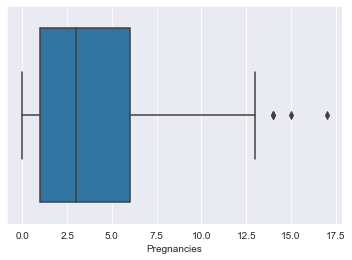

In [100]:
sns.boxplot(x=df['Pregnancies'])

Seems like it is fine. 0 makes sense and 17 while high isn't impossible.

In [101]:
df.shape

(768, 9)

#### Glucose

In [102]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<AxesSubplot:xlabel='Glucose'>

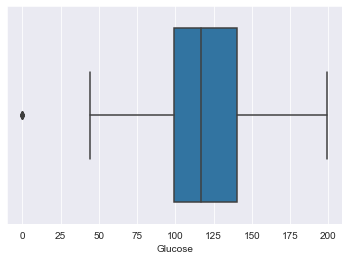

In [103]:
sns.boxplot(x=df['Glucose'])

In [104]:
print(np.where(df['Glucose']==0))

(array([ 75, 182, 342, 349, 502]),)


In [105]:
print(np.where(np.isnan(df['Glucose'])))

(array([], dtype=int64),)


In [106]:
z = np.abs(stats.zscore(df['Glucose'])) 
print(np.where(z > 3))

(array([ 75, 182, 342, 349, 502]),)


In [107]:
Q1 = np.percentile(df['Glucose'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Glucose'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['Glucose'] >= (Q3+1.5*IQR))
lower = np.where(df['Glucose'] <= (Q1-1.5*IQR))

print(upper)
print(lower)

(array([], dtype=int64),)
(array([ 75, 182, 342, 349, 502]),)


There's not too many rows, we can drop the ones that equal 0. These are all the outliers too

In [108]:
print("Old Shape: ", df.shape)
df.drop(lower[0], inplace=True)
print("New Shape: ", df.shape)

Old Shape:  (768, 9)
New Shape:  (763, 9)


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    int64  
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


#### BloodPressure

In [110]:
df['BloodPressure'].describe()

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<AxesSubplot:xlabel='BloodPressure'>

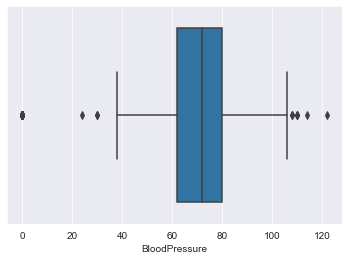

In [111]:
sns.boxplot(x=df['BloodPressure'])

In [112]:
print(np.where(df['BloodPressure']==0))

(array([  7,  15,  49,  60,  77,  80, 171, 191, 220, 259, 264, 267, 298,
       330, 334, 344, 353, 422, 426, 431, 449, 464, 480, 490, 517, 528,
       530, 584, 596, 599, 614, 638, 692, 698, 701]),)


In [113]:
print(np.where(np.isnan(df['BloodPressure'])))

(array([], dtype=int64),)


In [114]:
z = np.abs(stats.zscore(df['BloodPressure'])) 
print(np.where(z > 3))

(array([  7,  15,  49,  60,  77,  80, 171, 191, 220, 259, 264, 267, 298,
       330, 334, 344, 353, 422, 426, 431, 449, 464, 480, 490, 517, 528,
       530, 584, 596, 599, 614, 638, 692, 698, 701]),)


In [115]:
Q1 = np.percentile(df['BloodPressure'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['BloodPressure'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['BloodPressure'] >= (Q3+1.5*IQR))
lower = np.where(df['BloodPressure'] <= (Q1-1.5*IQR))

print(upper)
print(lower)

(array([ 43,  83, 105, 176, 358, 544, 686]),)
(array([  7,  15,  18,  49,  60,  77,  80, 124, 171, 191, 220, 259, 264,
       267, 298, 330, 334, 344, 353, 422, 426, 431, 449, 464, 480, 490,
       517, 528, 530, 584, 592, 596, 599, 614, 638, 692, 698, 701]),)


Should we drop? No, there are too many values to drop. We'll have to handle them some other way.

#### SkinThickness

In [116]:
df['SkinThickness'].describe()

count    763.000000
mean      20.477064
std       15.973171
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

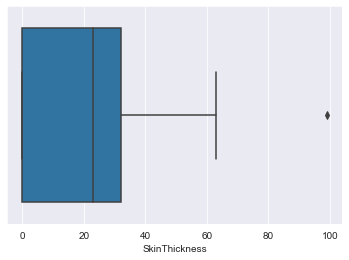

In [117]:
sns.boxplot(x=df['SkinThickness'])

In [118]:
print(np.where(df['SkinThickness']==0))

(array([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,  26,  29,
        33,  36,  41,  44,  46,  49,  58,  60,  61,  62,  64,  67,  72,
        75,  77,  80,  83,  89,  92,  99, 100, 101, 103, 105, 112, 114,
       115, 116, 122, 123, 128, 130, 137, 139, 142, 147, 150, 153, 163,
       166, 167, 169, 175, 177, 178, 179, 181, 182, 188, 190, 191, 194,
       199, 205, 217, 219, 220, 224, 228, 231, 233, 237, 240, 244, 248,
       249, 259, 262, 264, 266, 267, 270, 272, 276, 278, 281, 282, 292,
       297, 298, 301, 302, 315, 317, 325, 330, 331, 334, 335, 337, 340,
       341, 344, 346, 347, 350, 351, 357, 359, 362, 374, 387, 390, 394,
       396, 397, 400, 402, 403, 404, 414, 422, 426, 429, 431, 433, 435,
       439, 447, 449, 452, 457, 460, 464, 469, 470, 480, 485, 490, 491,
       492, 500, 504, 507, 508, 512, 513, 517, 518, 519, 524, 526, 528,
       530, 531, 532, 547, 552, 554, 555, 559, 565, 566, 572, 573, 578,
       581, 582, 584, 587, 591, 593, 596, 599, 610, 611, 614, 6

In [119]:
print(np.where(np.isnan(df['SkinThickness'])))

(array([], dtype=int64),)


In [120]:
z = np.abs(stats.zscore(df['SkinThickness'])) 
print(np.where(z > 3))

(array([574]),)


In [121]:
Q1 = np.percentile(df['SkinThickness'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['SkinThickness'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['SkinThickness'] >= (Q3+1.5*IQR))
lower = np.where(df['SkinThickness'] <= (Q1-1.5*IQR))

print(upper)
print(lower)

(array([574]),)
(array([], dtype=int64),)


While there are not as many outliers (only 1), we can say this is possibly legitimate. The skin thickness of 0 rows are what is more troubling. There are too many to delete, and the column is too important to drop. We'll have to handle this column another way.

#### Insulin

In [122]:
df['Insulin'].describe()

count    763.000000
mean      80.292267
std      115.457448
min        0.000000
25%        0.000000
50%       36.000000
75%      128.500000
max      846.000000
Name: Insulin, dtype: float64

<AxesSubplot:xlabel='Insulin'>

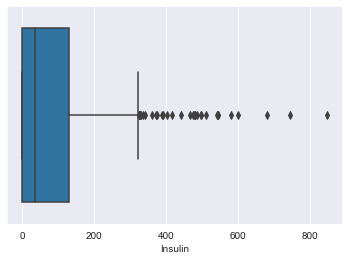

In [123]:
sns.boxplot(x=df['Insulin'])

In [124]:
print(np.where(df['Insulin']==0))

(array([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,
        23,  26,  29,  30,  33,  34,  36,  37,  38,  41,  42,  44,  45,
        46,  47,  48,  49,  55,  58,  60,  61,  62,  64,  65,  66,  67,
        72,  74,  75,  76,  77,  78,  79,  80,  82,  83,  85,  88,  89,
        92,  95,  99, 100, 101, 103, 105, 112, 114, 115, 116, 117, 120,
       122, 123, 128, 130, 132, 137, 139, 140, 142, 144, 145, 147, 148,
       150, 153, 154, 159, 162, 163, 165, 166, 167, 169, 171, 175, 177,
       178, 179, 181, 182, 183, 188, 190, 191, 192, 194, 198, 199, 200,
       203, 205, 207, 208, 209, 210, 216, 217, 219, 220, 224, 225, 228,
       231, 233, 235, 236, 237, 238, 240, 243, 244, 247, 248, 249, 251,
       253, 254, 255, 259, 260, 261, 262, 264, 265, 266, 267, 268, 270,
       272, 274, 276, 278, 281, 282, 292, 297, 298, 301, 302, 308, 312,
       315, 317, 319, 320, 322, 325, 328, 330, 331, 334, 335, 337, 340,
       341, 344, 346, 347, 348, 350, 351, 353, 357, 358, 359, 3

In [125]:
print(np.where(np.isnan(df['Insulin'])))

(array([], dtype=int64),)


In [126]:
count = (df['Insulin'] == 0).sum()
print(count)

370


This data set can be considered incomplete due to almost half of it missing insulin values.

In [127]:
z = np.abs(stats.zscore(df['Insulin'])) 
print(np.where(z > 3))

(array([  8,  13, 110, 152, 184, 218, 226, 245, 284, 366, 405, 411, 482,
       579, 640, 650, 690, 748]),)


In [128]:
Q1 = np.percentile(df['Insulin'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Insulin'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['Insulin'] >= (Q3+1.5*IQR))
lower = np.where(df['Insulin'] <= (Q1-1.5*IQR))

print(upper)
print(lower)

(array([  8,  13,  54, 110, 138, 152, 184, 218, 226, 229, 245, 246, 256,
       284, 294, 356, 366, 371, 388, 405, 411, 476, 482, 514, 569, 579,
       640, 650, 690, 702, 705, 710, 748]),)
(array([], dtype=int64),)


While it seems the insulin values are within the possible range, there seems to be a weirdly large amount of 0 values. We'll have to keep these values. We'll have to handle this column another way. 

#### BMI

In [129]:
df['BMI'].describe()

count    763.000000
mean      31.986763
std        7.893221
min        0.000000
25%       27.300000
50%       32.000000
75%       36.550000
max       67.100000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

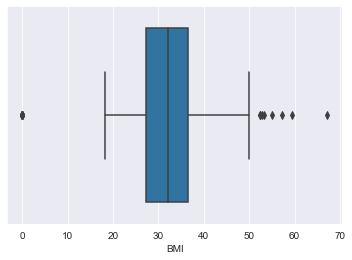

In [130]:
sns.boxplot(x=df['BMI'])

In [131]:
print(np.where(df['BMI']==0))

(array([  9,  49,  60,  80, 144, 367, 422, 490, 517, 679, 701]),)


In [132]:
z = np.abs(stats.zscore(df['BMI'])) 
print(np.where(z > 3))

(array([  9,  49,  60,  80, 144, 176, 367, 422, 441, 490, 517, 668, 679,
       701]),)


In [133]:
Q1 = np.percentile(df['BMI'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['BMI'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['BMI'] >= (Q3+1.5*IQR))
lower = np.where(df['BMI'] <= (Q1-1.5*IQR))

print(upper)
print(lower)

(array([119, 124, 176, 191, 245, 301, 441, 668]),)
(array([  9,  49,  60,  80, 144, 367, 422, 490, 517, 679, 701]),)


In [134]:
print("Old Shape: ", df.shape)
df = df[df.BMI != 0]
print("New Shape: ", df.shape)

Old Shape:  (763, 9)
New Shape:  (752, 9)


Since there are not too many rows, we can drop them. We will only drop the lower bound outliers which all happen to equal 0. The max BMI value is possible, so we don't need to drop the upper bound values.

#### DiabetesPedigreeFunction

In [135]:
df['DiabetesPedigreeFunction'].describe()

count    752.000000
mean       0.473051
std        0.330108
min        0.078000
25%        0.244000
50%        0.377000
75%        0.627500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

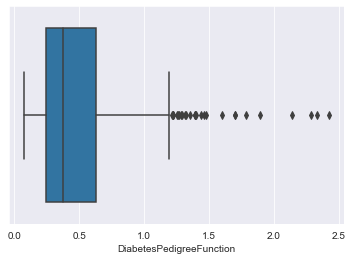

In [136]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

Everything here has reasonable values and nothing seems missing.

#### Age

In [137]:
df['Age'].describe()

count    752.000000
mean      33.312500
std       11.709395
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

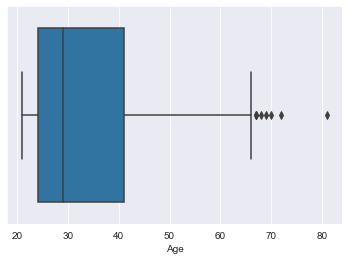

In [138]:
sns.boxplot(x=df['Age'])

Everything here has reasonable values and nothing seems missing.

In [139]:
df.shape


(752, 9)

In [140]:
df.reset_index(drop=True, inplace=True)
df[40:50]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
40            7      133             84              0        0  40.2   
41            7      106             92             18        0  22.7   
42            9      171            110             24      240  45.4   
43            7      159             64              0        0  27.4   
44            0      180             66             39        0  42.0   
45            1      146             56              0        0  29.7   
46            2       71             70             27        0  28.0   
47            7      103             66             32        0  39.1   
48            1      103             80             11       82  19.4   
49            1      101             50             15       36  24.2   

    DiabetesPedigreeFunction  Age  Outcome  
40                     0.696   37        0  
41                     0.235   48        0  
42                     0.721   54        1  
43                     0.294   40        0  
44                     1.893   25        1  
45                     0.564   29        0  
46                     0.586   22        0  
47                     0.344   31        1  
48                     0.491   22        0  
49                     0.526   26        0

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    int64  
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    int64  
 4   Insulin                   752 non-null    int64  
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.0 KB


Now, we need to imputate some columns and wrangle a couple.

### Replacing Missing Values

There are 3 columns that require imputation since they have what seems like Missing Completely At Random (MCAR) values. BloodPressure, SkinThickness, Insulin.

Let's take a look by column.

#### BloodPressure

In [142]:
df.value_counts(df['BloodPressure']==0)

BloodPressure
False    724
True      28
dtype: int64

In [143]:
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)

In [144]:
df.value_counts(df['BloodPressure']==0)

BloodPressure
False    752
dtype: int64

Confirmed converted all 0 values to not a number for BloodPressure.

#### SkinThickness

In [145]:
df.value_counts(df['SkinThickness']==0)

SkinThickness
False    534
True     218
dtype: int64

In [146]:
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)

In [147]:
df.value_counts(df['SkinThickness']==0)

SkinThickness
False    752
dtype: int64

#### Insulin

In [148]:
df.value_counts(df['Insulin']==0)

Insulin
False    392
True     360
dtype: int64

In [149]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)

In [150]:
df.value_counts(df['SkinThickness']==0)

SkinThickness
False    752
dtype: int64

#### Multi Imputation

Now we need to imputate values. We will use multiple imputations since we are working with multivariate data. We'll use SciKit's IterativeImputer.

In [151]:
imputer = IterativeImputer(max_iter=50, random_state=0)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

In [152]:
df_imputed.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   752.000000  752.000000      752.00000     752.000000  752.000000   
mean      3.851064  121.941489       72.38427      28.930645  153.562744   
std       3.375189   30.601198       12.19036       9.587113   97.875143   
min       0.000000   44.000000       24.00000       7.000000  -19.056486   
25%       1.000000   99.750000       64.00000      22.000000   90.000000   
50%       3.000000  117.000000       72.00000      28.631256  130.564651   
75%       6.000000  141.000000       80.00000      35.000000  190.000000   
max      17.000000  199.000000      122.00000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  752.000000                752.000000  752.000000  752.000000  
mean    32.454654                  0.473051   33.312500    0.351064  
std      6.928926                  0.330108   11.709395    0.477621  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.377000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Confirm the imputations' min and max seem reasonable. It seems there is one row in Insulin we should remove soon.

In [153]:
df_imputed.value_counts(df_imputed['Insulin']<=0)

Insulin
False    751
True       1
dtype: int64

Before we do that, let's create a new dataframe. Since the transformation was applied to each column, we need to only take the imputated columns of Insulin, BloodPressure, and Skinthickness.

In [154]:
df_new = df.drop(['Insulin', 'BloodPressure', 'SkinThickness'], axis=1)

df_new.describe()

Pregnancies     Glucose         BMI  DiabetesPedigreeFunction  \
count   752.000000  752.000000  752.000000                752.000000   
mean      3.851064  121.941489   32.454654                  0.473051   
std       3.375189   30.601198    6.928926                  0.330108   
min       0.000000   44.000000   18.200000                  0.078000   
25%       1.000000   99.750000   27.500000                  0.244000   
50%       3.000000  117.000000   32.300000                  0.377000   
75%       6.000000  141.000000   36.600000                  0.627500   
max      17.000000  199.000000   67.100000                  2.420000   

              Age     Outcome  
count  752.000000  752.000000  
mean    33.312500    0.351064  
std     11.709395    0.477621  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000000    1.000000

In [155]:
df_new.shape

(752, 6)

In [156]:
df_new.insert(2,'BloodPressure',df_imputed['BloodPressure'])
df_new.insert(3,'SkinThickness',df_imputed['SkinThickness'])
df_new.insert(4,'Insulin',df_imputed['Insulin'])

df_new.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   752.000000  752.000000      752.00000     752.000000  752.000000   
mean      3.851064  121.941489       72.38427      28.930645  153.562744   
std       3.375189   30.601198       12.19036       9.587113   97.875143   
min       0.000000   44.000000       24.00000       7.000000  -19.056486   
25%       1.000000   99.750000       64.00000      22.000000   90.000000   
50%       3.000000  117.000000       72.00000      28.631256  130.564651   
75%       6.000000  141.000000       80.00000      35.000000  190.000000   
max      17.000000  199.000000      122.00000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  752.000000                752.000000  752.000000  752.000000  
mean    32.454654                  0.473051   33.312500    0.351064  
std      6.928926                  0.330108   11.709395    0.477621  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.377000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Comparing this to our original dataframe:

In [157]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   752.000000  752.000000     724.000000     534.000000  392.000000   
mean      3.851064  121.941489      72.400552      29.172285  156.056122   
std       3.375189   30.601198      12.379870      10.507582  118.841690   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      22.000000   76.750000   
50%       3.000000  117.000000      72.000000      29.000000  125.500000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  752.000000                752.000000  752.000000  752.000000  
mean    32.454654                  0.473051   33.312500    0.351064  
std      6.928926                  0.330108   11.709395    0.477621  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.377000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Now we have imputated the columns that had a lot of null values. In order to check the accuracy of the imputated values, I wanted to create a copy of the original data and replace 10% of its values randomly with NaN, creating a new test dataframe. The test dataframe would then have the imputator run on it, giving it imputated values the same way as above. Afterwards, I would've checked the Root Mean Square Error between the test dataframa and the original data frame. However, I would also need to create a baseline to interpret the RMSE. I planned on using univariate imputation (the mean) to serve as a baseline for comparison. If the multi imputation RMSE is better than that of the baseline, we could then say that its imputations are more accurate. 

Let's not forget, we still need to remove 1 last missing value:

In [158]:
x = np.where(df_new['Insulin']<=0)
print(x)

(array([59]),)


In [159]:
print("Old: ", df_new.shape)
df_new.drop(x[0], inplace=True)
print("New: ", df_new.shape)

Old:  (752, 9)
New:  (751, 9)


In [160]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 751
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               751 non-null    int64  
 1   Glucose                   751 non-null    int64  
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             751 non-null    float64
 4   Insulin                   751 non-null    float64
 5   BMI                       751 non-null    float64
 6   DiabetesPedigreeFunction  751 non-null    float64
 7   Age                       751 non-null    int64  
 8   Outcome                   751 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 58.7 KB


In [161]:
df_new.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   751.000000  751.000000     751.000000     751.000000  751.000000   
mean      3.849534  122.045273      72.398097      28.941157  153.792596   
std       3.377178   30.488871      12.192581       9.589165   97.737064   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000  100.000000      64.000000      22.043907   90.009553   
50%       3.000000  117.000000      72.000000      28.640293  130.684263   
75%       6.000000  141.000000      80.000000      35.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  751.000000                751.000000  751.000000  751.000000  
mean    32.464581                  0.472899   33.308921    0.351531  
std      6.928191                  0.330302   11.716787    0.477767  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.376000   29.000000    0.000000  
75%     36.600000                  0.628000   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Now that imputation is done, we need to figure out how we want to handle our continous values.

### Data Preprocessing

Let's first check if our data is normally distributed for BMI.

#### Research Question

Is BMI normally distributed? We will find out using the D’Agostino’s K^2 Test.

**Null Hypothesis** : p >= 0.05
<br/>
**Alt Hypothesis** : p < 0.05

<AxesSubplot:xlabel='BMI', ylabel='Count'>

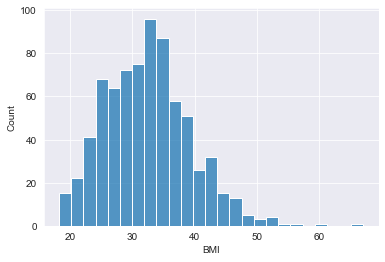

In [162]:
sns.histplot(df_new['BMI'])

In [163]:
shapiro(df_new['BMI'])

ShapiroResult(statistic=0.9795335531234741, pvalue=9.450153548584694e-09)

In [164]:
# normality test (D’Agostino’s K^2 Test)
stat, p = normaltest(df_new['BMI'])
print('pvalue=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Fail to reject null')
else:
	print('Reject null')

pvalue= 4.787359823359519e-12
Reject null


**Therefore** we reject the null hypothesis as p < 0.05. BMI is not normally distributed

#### Research Question

Is Glucose normally distributed? We will find out using the D’Agostino’s K^2 Test.

**Null Hypothesis** : p >= 0.05
<br/>
**Alt Hypothesis** : p < 0.05

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

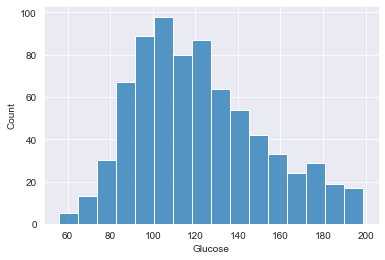

In [165]:
sns.histplot(df_new['Glucose'])

In [166]:
shapiro(df_new['Glucose'])

ShapiroResult(statistic=0.9678667783737183, pvalue=8.740782403426905e-12)

In [167]:
# normality test (D’Agostino’s K^2 Test)
stat, p = normaltest(df_new['Glucose'])
print('pvalue=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Fail to reject null')
else:
	print('Reject null')

pvalue= 8.821192628522038e-09
Reject null


**Therefore** we reject the null hypothesis as p < 0.05. Glucose is not normally distributed

#### Research Question

Is Insulin normally distributed? We will find out using the D’Agostino’s K^2 Test.

**Null Hypothesis** : p >= 0.05
<br/>
**Alt Hypothesis** : p < 0.05

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

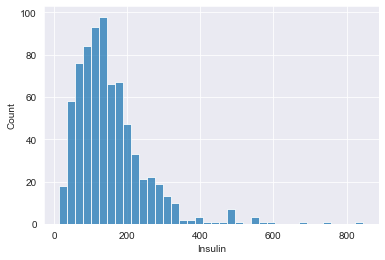

In [168]:
sns.histplot(df_new['Insulin'])

In [169]:
shapiro(df_new['Insulin'])

ShapiroResult(statistic=0.8430558443069458, pvalue=1.3876308301126524e-26)

In [170]:
# normality test (D’Agostino’s K^2 Test)
stat, p = normaltest(df_new['Insulin'])
print('pvalue=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Fail to reject null')
else:
	print('Reject null')

pvalue= 1.1742006103207484e-81
Reject null


**Therefore** we reject the null hypothesis as p < 0.05. Insulin is not normally distributed

Would binning be appropriate for any of our continious columns? It seems it would only make sense for BMI[1], as graphs online seem to often bin them into 4 groups. Now we need to choose between equal-width or equal-frequency binning for BMI.

Since BMI is not normal and there are too many outliers, I will use equal-frequency binning. This reflects how BMI is sometimes divided up into groups that are not equal in widths. I had tried normalizing the data using sklearn's preprocessing library, however, I was not able to get them to pass their D'Agostino test.

[1]https://sticky.co.uk/thinking/article/why-we-need-to-bin-bmi

In [171]:
df_binned = df_new.copy()
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_binned['BMI_Quantiles'] = pd.qcut(df_binned['BMI'], q=4, labels=labels)

In [218]:
df_binned.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   751.000000  751.000000     751.000000     751.000000  751.000000   
mean      3.849534  122.045273      72.398097      28.941157  153.792596   
std       3.377178   30.488871      12.192581       9.589165   97.737064   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000  100.000000      64.000000      22.043907   90.009553   
50%       3.000000  117.000000      72.000000      28.640293  130.684263   
75%       6.000000  141.000000      80.000000      35.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  751.000000                751.000000  751.000000  751.000000  
mean    32.464581                  0.472899   33.308921    0.351531  
std      6.928191                  0.330302   11.716787    0.477767  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.376000   29.000000    0.000000  
75%     36.600000                  0.628000   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [173]:
df_binned['BMI_Quantiles'].value_counts()

Underweight    191
Overweight     189
Obese          186
Normal         185
Name: BMI_Quantiles, dtype: int64

In [ ]:
labels = ['High', '', 'Overweight', 'Obese']
df_binned['BMI_Quantiles'] = pd.qcut(df_binned['BMI'], q=4, labels=labels)

Since we've found the data is not normal, we want to normalize it for our t-tests and ANOVA modeling.

In [174]:
df_normal = df_binned.drop('BMI_Quantiles', axis=1)
col = df_normal.columns
df_normal = preprocessing.normalize(df_normal)
df_normal = pd.DataFrame(df_normal, columns=col)

shapiro(df_normal['BMI'])

ShapiroResult(statistic=0.9814417958259583, pvalue=3.6775411160760996e-08)

It seems despite trying to normalize the data, the test still shows it rejecting the null hypothesis with a pvalue < 0.05.

## 3 - Exploratory Data Analysis

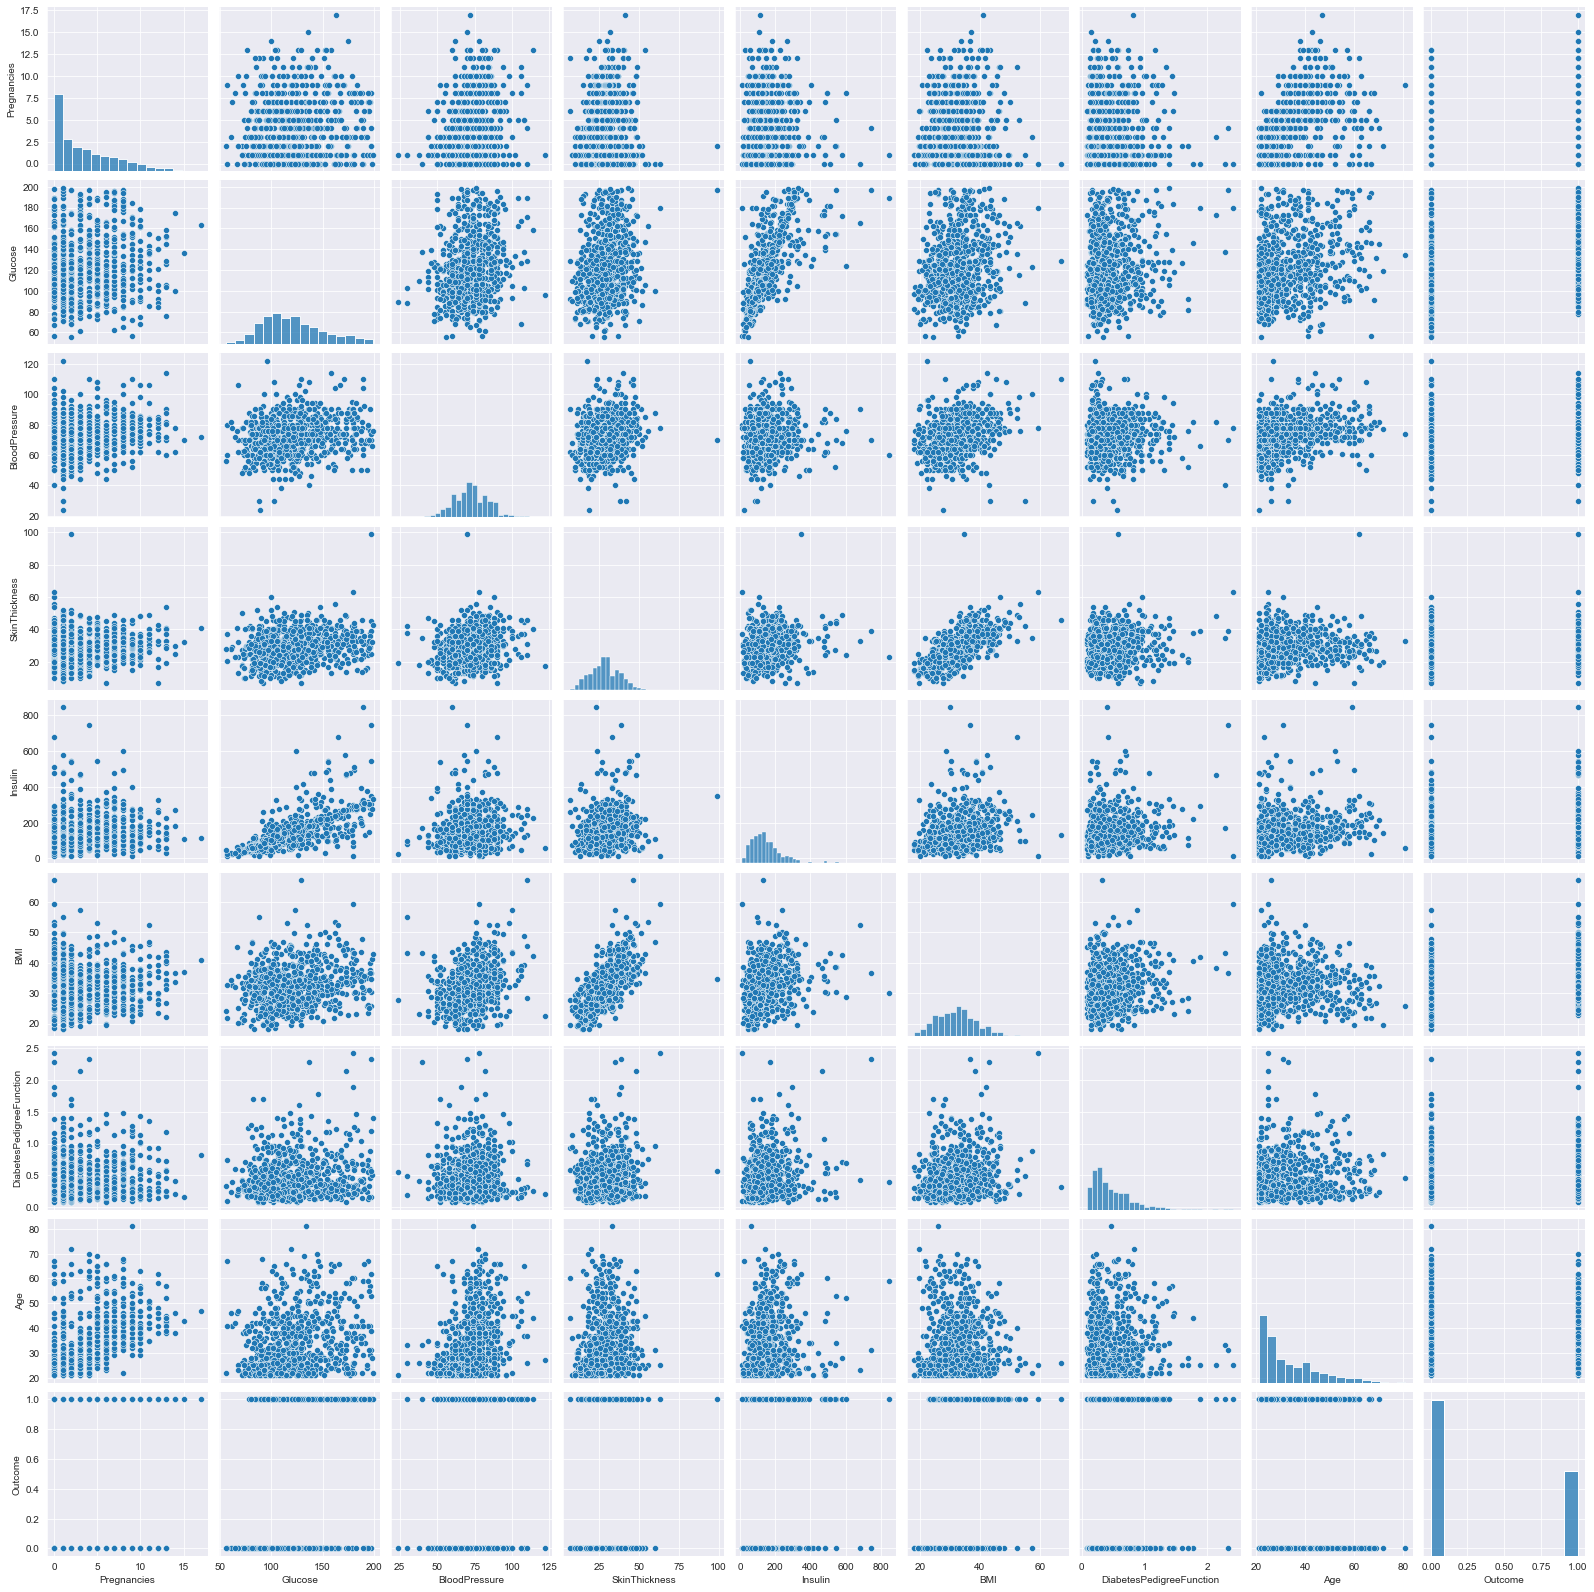

In [175]:
df_clean = df_binned.copy()
sns.pairplot(df_clean)

<AxesSubplot:>

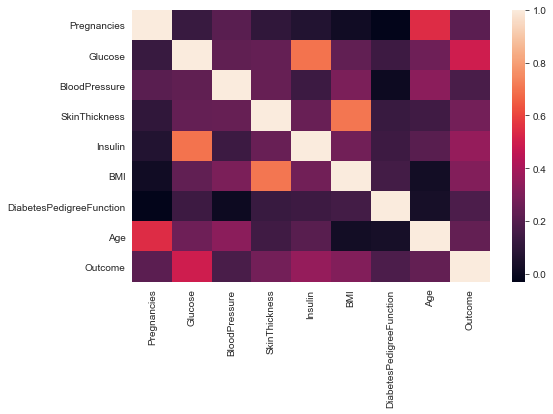

In [176]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_clean.corr(), ax=ax)

### Single Variable Exploration

<AxesSubplot:xlabel='Outcome', ylabel='count'>

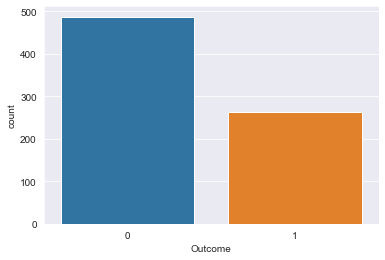

In [177]:
sns.countplot(x='Outcome', data=df_clean)

What's interesting to not is that there are more 0 outcomes than 1. However, it doesn't seem to be enough of a discrepancy.

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

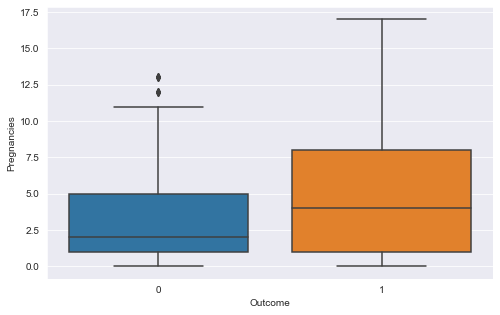

In [178]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='Pregnancies', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

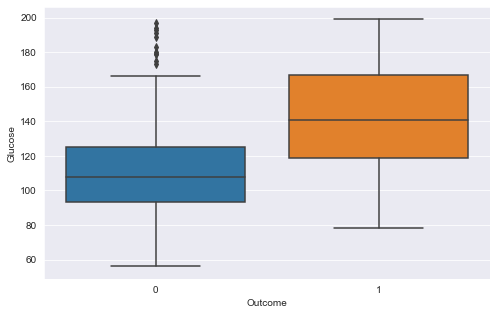

In [179]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

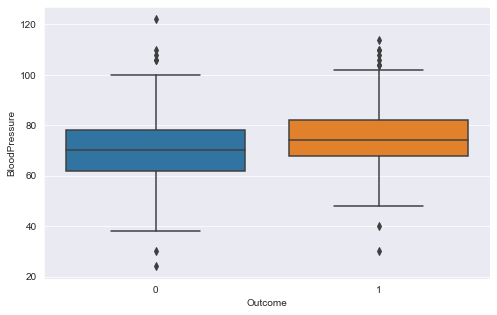

In [180]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

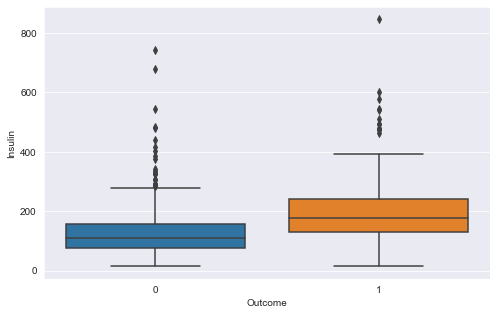

In [181]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='Insulin', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

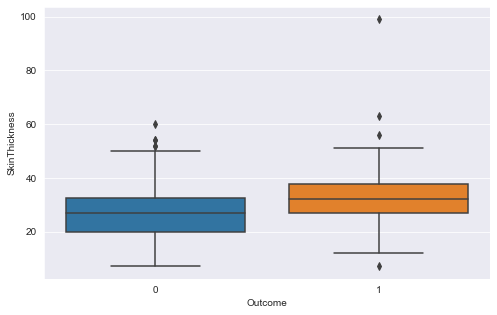

In [182]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

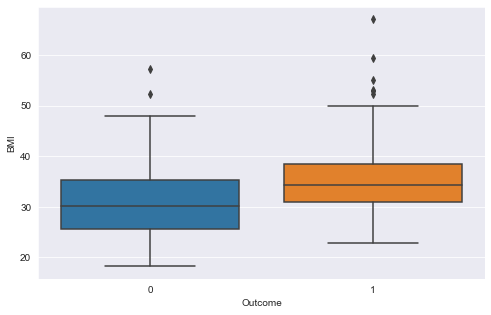

In [183]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='BMI', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

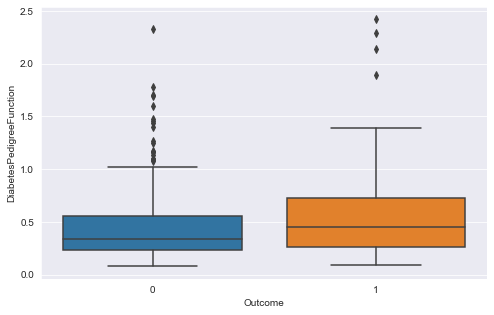

In [184]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df_clean, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

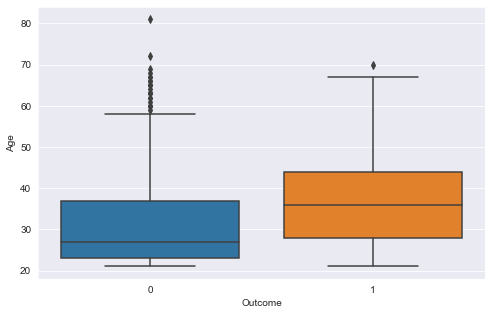

In [185]:
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df_clean, ax=ax)

Based off these boxplots, it seems Pregnancies, Glucose, Insulin, and Age may be interesting to look into. Their means for those positive with Diabetes is noticeably higher than those without Diabetes.

### Multi-variable Exploration

<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

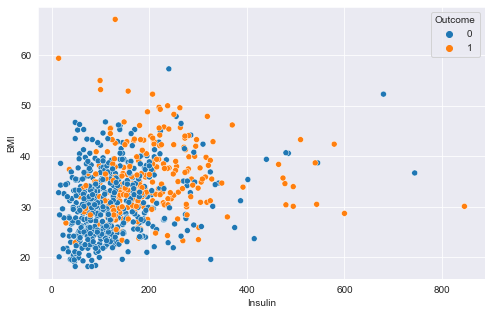

In [186]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Insulin', y='BMI', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Insulin', ylabel='Age'>

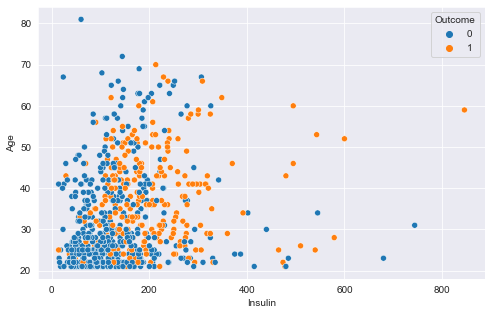

In [187]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Insulin', y='Age', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

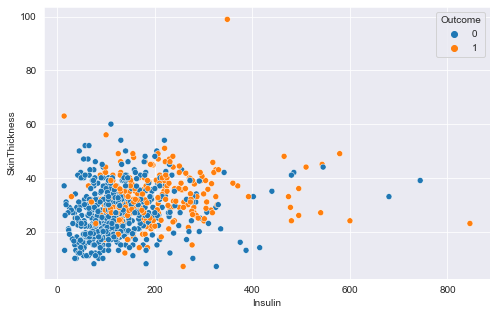

In [188]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Insulin', y='SkinThickness', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

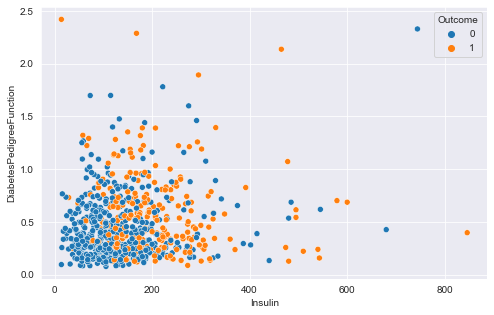

In [189]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Insulin', y='DiabetesPedigreeFunction', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

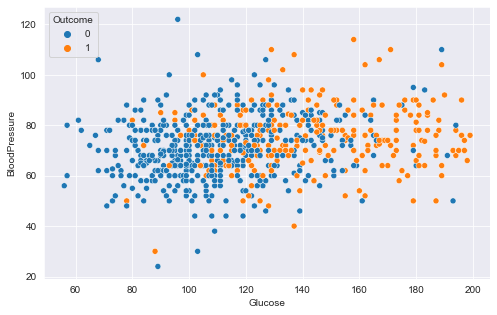

In [190]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='BloodPressure', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

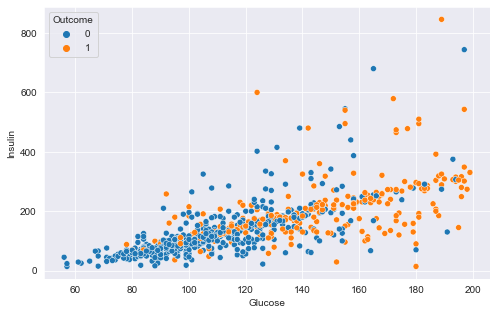

In [191]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='Insulin', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

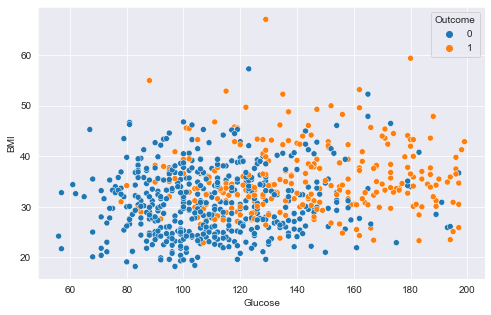

In [192]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='BMI', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

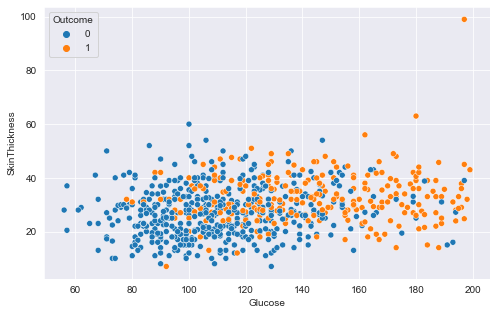

In [193]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='SkinThickness', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

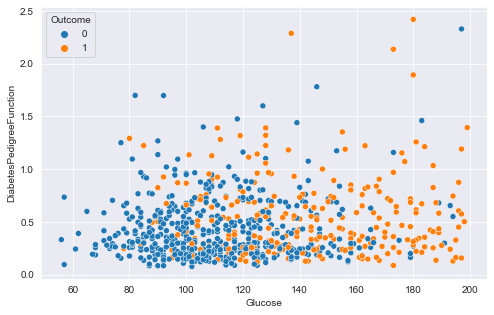

In [194]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=df_clean, ax=ax, hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

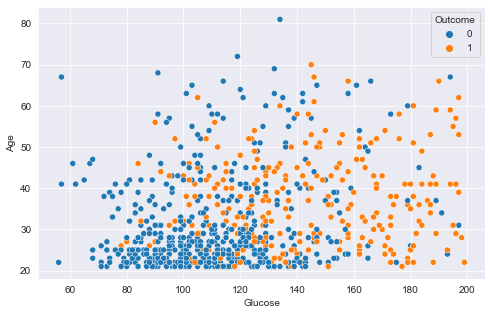

In [195]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Glucose', y='Age', data=df_clean, ax=ax, hue='Outcome')

From this, Glucose seems to have the most correlation with positive Diabetes. Glucose has the highest correlation based on the heatmap with Diabetes, and this is consistent across the scatter plots based off of the hue separation. It seems Glucose and Insulin have a relationshiop that appears linear. This also potentially true with BMI as well. Interestingly, Insulin and BMI are second and third on the heatmap after Glucose.

### T-tests

We will conduct the following t-tests:

##### Two-Sample Tests
1. Glucose and Insulin for positive and negative outcomes.

2. Glucose and BMI for positive and negative outcomes.

3. Glucose and Age for positive and negative outcomes.

4. Insulin and BMI for positive and negative outcomes.


##### Paired Tests
1. Glucose means for positive and negative outcomes.

2. Insulin means for positive and negative outcomes.

3. BMI means for positive and negative outcomes.

4. Age means for positive and negative outcomes.



In [196]:
pos = df_clean[df_clean['Outcome'] == 1]
neg = df_clean[df_clean['Outcome'] == 0]

#### Two Sample Test 1

**Null hypothesis**: The means for Glucose and Insulin in Positive and Negative Outcomes are equal
<br/>
**Alternative hypothesis**: The means for Glucose and Insulin in Positive Outcomes and Negative Outcomes are not equal

In [197]:
a = pos['Glucose'].to_numpy()
b = pos['Insulin'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-8.811132303239212, pvalue=1.8053959490404046e-17)

In [198]:
a = neg['Glucose'].to_numpy()
b = neg['Insulin'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-4.34501797109405, pvalue=1.5390185453691778e-05)

Since the pvalue is smaller than the 0.05 alpha, we can conclude that there is a significant difference between Glucose and Insulin groups for positive and negative outcomes. **We reject the null hypothesis**

#### Two Sample Test 2

**Null hypothesis**: The means for Glucose and BMI in Positive and Negative Outcomes are equal
<br/>
**Alternative hypothesis**: The means for Glucose and BMI in Positive Outcomes and Negative Outcomes are not equal

In [199]:
a = pos['Glucose'].to_numpy()
b = pos['BMI'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=57.29691532635989, pvalue=2.762158596557865e-228)

In [200]:
a = neg['Glucose'].to_numpy()
b = neg['BMI'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=69.19888579254908, pvalue=0.0)

Since the pvalue is smaller than the 0.05 alpha, we can conclude that Glucose is signficantly different than BMI. **We reject the null hypothesis for positive and negative outcomes**

#### Two Sample Test 3

**Null hypothesis**: The means for Glucose and Age in Positive and Negative Outcomes are equal
<br/>
**Alternative hypothesis**: The means for Glucose and Age in Positive Outcomes and Negative Outcomes are not equal

In [201]:
a = pos['Glucose'].to_numpy()
b = pos['Age'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=54.205222833213966, pvalue=1.906880453448488e-217)

In [202]:
a = neg['Glucose'].to_numpy()
b = neg['Age'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=64.45768473890796, pvalue=0.0)

Since the pvalue is smaller than the 0.05 alpha, we can conclude that glucose is signficantly different than age. **We reject the null hypothesis for positive and negative outcomes**

#### Two Sample Test 4

**Null hypothesis**: The means for Insulin and BMI in Positive and Negative Outcomes are equal
<br/>
**Alternative hypothesis**: The means for Insulin and BMI in Positive Outcomes and Negative Outcomes are not equal

In [203]:
a = pos['Insulin'].to_numpy()
b = pos['BMI'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=25.875931700049158, pvalue=7.657713528194407e-96)

In [204]:
a = neg['Insulin'].to_numpy()
b = neg['BMI'].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=25.511489253477, pvalue=2.6185171787352867e-110)

Since the pvalue is smaller than the 0.05 alpha, we can conclude that insulin is signficantly different than BMI. **We reject the null hypothesis for positive and negative outcomes**

#### Paired Test 1

**Null hypothesis**: There is no difference for Glucose means in positive and negative outcomes
<br/>
**Alternative hypothesis**: There is a difference for Glucose means in positive and negative outcomes

In [205]:
a = pos['Glucose'].to_numpy()
b = neg['Glucose'].to_numpy()

b = b[:264] #make them equal size

st.ttest_rel(a, b)

Ttest_relResult(statistic=12.7687919307519, pvalue=2.2320450867139258e-29)

Since the pvalue is smaller than the 0.05 alpha, we can conclude there is a difference between Glucose in positive and negative outcomes. **We reject the null hypothesis**

#### Paired Test 2

**Null hypothesis**: There is no difference for Insulin means in positive and negative outcomes
<br/>
**Alternative hypothesis**: There is a difference for Insulin means in positive and negative outcomes

In [206]:
a = pos['Insulin'].to_numpy()
b = neg['Insulin'].to_numpy()

b = b[:264] #make them equal size

st.ttest_rel(a, b)

Ttest_relResult(statistic=8.34336199938496, pvalue=4.1170753163459705e-15)

Since the pvalue is smaller than the 0.05 alpha, we can conclude there is a difference between Insulin in positive and negative outcomes. **We reject the null hypothesis**

#### Paired Test 3

**Null hypothesis**: There is no difference for BMI means in positive and negative outcomes
<br/>
**Alternative hypothesis**: There is a difference for BMI means in positive and negative outcomes

In [207]:
a = pos['BMI'].to_numpy()
b = neg['BMI'].to_numpy()

b = b[:264] #make them equal size

st.ttest_rel(a, b)

Ttest_relResult(statistic=7.911667424423966, pvalue=7.08168296321381e-14)

Since the pvalue is smaller than the 0.05 alpha, we can conclude there is a difference between BMI in positive and negative outcomes. **We reject the null hypothesis**

#### Paired Test 4

**Null hypothesis**: There is no difference for Age means in positive and negative outcomes
<br/>
**Alternative hypothesis**: There is a difference for Age means in positive and negative outcomes

In [208]:
a = pos['Age'].to_numpy()
b = neg['Age'].to_numpy()

b = b[:264] #make them equal size

st.ttest_rel(a, b)

Ttest_relResult(statistic=6.784139271246682, pvalue=7.695649480699137e-11)

Since the pvalue is smaller than the 0.05 alpha, we can conclude there is a difference between Age in positive and negative outcomes. **We reject the null hypothesis**

## 4 - Modeling 

### ANOVA REDUX

Our ANOVAs will be non-parametric

We may have already proved the data for BMI, Glucose, and Insulin aren't normal, but let's take a high-level look. Specifically, we will look at Glucose then Insulin relative to our BMI_Quantiles.

In [339]:
import researchpy as rp

#Glucose
rp.summary_cont(df_clean['Glucose'])

Variable      N      Mean       SD      SE  95% Conf.  Interval
0  Glucose  751.0  122.0453  30.4889  1.1126   119.8612  124.2294

Here, we can see the mean, standard deviation, and confidence intervals. 

We shall create two one-way ANOVA models, defined as below:

- 1) Dependent Continuous: Glucose, Independent Categorical: BMI Quantiles
- 2) Dependent Continuous: Glucose, Independent Categorical: Outcome

#### 1) One-Way: Dependent: Glucose and Independent: BMI Quantiles

**Null hypothesis**: Groups of BMI means are equal for Glucose
<br/>
**Alternative hypothesis**: At least 1 group's mean is not equal to the rest

Let's begin by taking a look at BMI Quantiles relative to Glucose.

In [384]:
rp.summary_cont(df_clean['Glucose'].groupby(df_clean['BMI_Quantiles']))

N      Mean       SD      SE  95% Conf.  Interval
BMI_Quantiles                                                     
Underweight    191  113.3822  26.6560  1.9288   109.5777  117.1867
Normal         185  119.8432  29.7135  2.1846   115.5332  124.1533
Overweight     189  125.3704  31.6044  2.2989   120.8354  129.9053
Obese          186  129.7527  31.5004  2.3097   125.1959  134.3095

We shall use both SciPy.Stats and StatsModel to conduct our one-way ANOVA.

In [240]:
#using SciPy.statsb
stats.f_oneway(df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Obese'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Overweight'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Normal'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Underweight'],
              )

F_onewayResult(statistic=10.562343006186966, pvalue=8.280529646477408e-07)

The purpose of this study was to test for a difference between BMI levels relative to Glucose. Since the P value is much lower than 0.05, we can say this is a statistically significant result and reject the null hypothesis. There are significant differences between the BMI groups and their relations to Glucose. We found that the overall average Glucose was 122.05 95% CI(119.9, 124.22) with group averages of:

```
Underweight: 113.38 95% CI(109.58, 117.19)
Normal:      119.84 95% CI(115.53, 124.15)
Overweight:  125.37 95% CI(120.84, 129.91)
Obsese:      129.75 95% CI(125.20, 134.31)
```

Let's now do this with the StatsModel library.

We will fit the model using an estimation method (in this case, ordinary least squares).
Why OLS? That's what [this article](https://www.pythonfordatascience.org/anova-python/#assumptions_hyptoheses) suggested to do. Upon further investigstion, OLS is used for estimating the unknown parameters in a linear regression model. Since ANOVA is a special case of regression using categorical, it makes sense to use OLS. Our independent categorical variable will be BMI_Quantiles, while our continuous dependent variable will be Glucose.

In [348]:
#using StatsModel
anova_model = ols("Glucose ~ C(BMI_Quantiles)", data= df_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
C(BMI_Quantiles)   28370.209459    3.0  10.562343  8.280530e-07
Residual          668808.251260  747.0        NaN           NaN

The above table shows us that the results are significant as based by the P value being < 0.05. This was the same exact P value obtained from using SciPy.stats. However, what we still don't know is the effect sizes.

To better measure effect sizes, we will use [this function](https://www.pythonfordatascience.org/anova-python/#:~:text=def%20anova_table(aov,cols%5D%0A%20%20%20%20return%20aov). As well, it will return a Type II sum of squares. Specifically, it will help us calculate the eta-squared and omega-squared values.

In [349]:
def anova_tableize(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_tableize(anova_table)

sum_sq     df      mean_sq          F        PR(>F)  \
C(BMI_Quantiles)   28370.209459    3.0  9456.736486  10.562343  8.280530e-07   
Residual          668808.251260  747.0   895.325638        NaN           NaN   

                    eta_sq  omega_sq  
C(BMI_Quantiles)  0.040693  0.036793  
Residual               NaN       NaN

We wanted to see the effect sizes of our ANOVA model. With an eta_sq of 0.04, this indicates a small effect. The proportion of variance in the dependent variable of Glucose is therefore poorly explained by the variance in our categeorical independent variable of BMI_Quantiles.

##### Assumptions Check

We will start with some assumption checks before proceeding with post-hoc testing.

In [376]:
#Checking for normality of residuals using Shapiro-Wilks
shapiro(anova_model.resid)

ShapiroResult(statistic=0.9762338995933533, pvalue=1.06516306885851e-09)

This demonstrates the residuals are not normally distributed. This is not surprising and is consistent with our previous normalcy findings.

We can also check for normality visually.

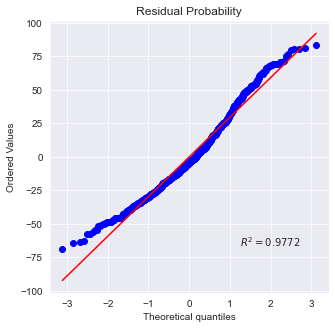

In [377]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(anova_model.resid, plot=plt, rvalue=True)
ax.set_title("Residual Probability", fontsize= 12)
ax.set

plt.show()

We can see visually there is some skewing involved, corroborating the Shapiro normality test.

In [378]:
#Checking for Homogeneity of Variance using Levene's Test
stats.levene(df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Obese'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Overweight'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Normal'],
               df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Underweight'],
              )

LeveneResult(statistic=4.338699963140403, pvalue=0.0048294295954123875)

This demonstrates there is statistically significant differences between each group's variability.

Let's take a look at it visually.

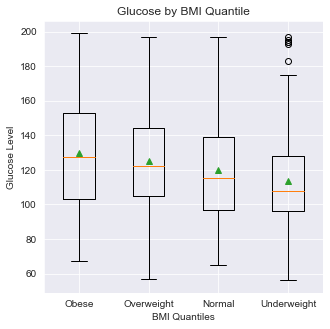

In [379]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Glucose by BMI Quantile", fontsize= 12)
ax.set

data = [df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Obese'],
        df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Overweight'],
        df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Normal'],
        df_clean['Glucose'][df_clean['BMI_Quantiles'] == 'Underweight']
       ]

ax.boxplot(data,
           labels= ['Obese', 'Overweight', 'Normal', 'Underweight'],
           showmeans= True)

plt.xlabel("BMI Quantiles")
plt.ylabel("Glucose Level")

plt.show()

We can see the variances are not equal. Before, we failed to normalize the data after finding it was not normal. Now, we also have found our variances are not equal between BMI Quantiles. At this point, we could try to remedy the unequal variance. Had there been more time, we could've tried transforming the dependent variable or use trimmed means. For now, we shall proceed with post-hoc testing in spite of the normality and equal variances assumptions failing.

##### Post-hoc

We want to see which groups significantly differ from each other.

Our first test will be the Tukey Honestly Significant Difference (HSD) test.

In [413]:
#Tukey HSD
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_clean['Glucose'], df_clean['BMI_Quantiles'])
res = comp.tukeyhsd()
res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

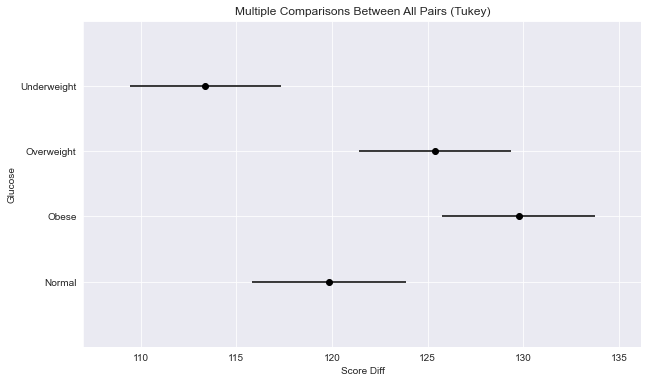

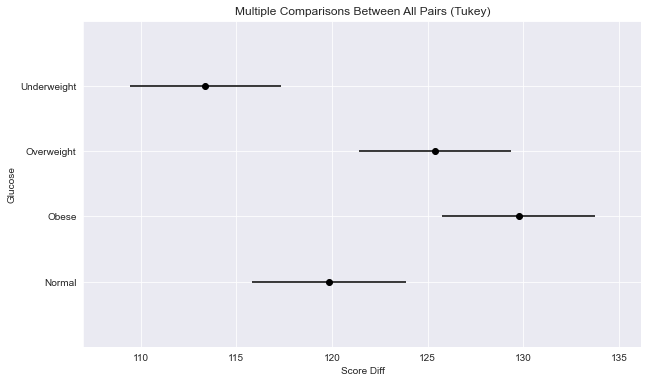

In [414]:
res.plot_simultaneous(ylabel="Glucose", xlabel="Score Diff")

THe Tukey HSD test shows us that there is a significant difference in Glucose for those who are underweight/normal versus those who are obese, and those who are underweight versus those who are overweight.

In [375]:
#Bonferroni Correction
comp = mc.MultiComparison(df_clean['Glucose'], df_clean['BMI_Quantiles'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>

The Bonferri Correction indicates that the groups that differed significantly are the same as from the Tukey HSD test.

In [381]:
#Sidak Correction
comp = mc.MultiComparison(df_clean['Glucose'], df_clean['BMI_Quantiles'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>

Doing the Sidak Correct, we obtain once again the same rejection results as the Bonferri Correction and Tukey HSD.

#### 2) One-Way: Dependent: Glucose and Independent: Outcome

**Null hypothesis**: Both Outcome groups are equal for Glucose
<br/>
**Alternative hypothesis**: At least 1 group's mean is not equal to the rest

We shall follow the same code as our prevoius One-Way model, except now for Outcome in place of BMI Quantiles.

In [386]:
rp.summary_cont(df_clean['Glucose'].groupby(df_clean['Outcome']))

N      Mean       SD      SE  95% Conf.  Interval
Outcome                                                     
0        487  110.9630  24.6756  1.1182   108.7660  113.1601
1        264  142.4886  29.6440  1.8245   138.8962  146.0811

In [382]:
#using SciPy.Stats
stats.f_oneway(df_clean['Glucose'][df_clean['Outcome'] == 0],
               df_clean['Glucose'][df_clean['Outcome'] == 1],
              )

F_onewayResult(statistic=241.803933020616, pvalue=1.8411197621107428e-47)

The purpose of this study was to test for a difference between Outcome relative to Glucose. Since the P value is much lower than 0.05, we can say this is a statistically significant result and reject the null hypothesis. There are significant differences between the Outcome and their relations to Glucose. We found that the overall average Glucose was 122.05 95% CI(119.9, 124.22) with group averages of:

```
0 (Non-Diabetic):  110.96 95% CI(108.77, 113.16)
1 (Diabetic):      142.49 95% CI(138.90, 146.08)
```

In [399]:
#using StatsModel
anova_model = ols("Glucose ~ C(Outcome)", data= df_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

sum_sq     df           F        PR(>F)
C(Outcome)  170145.160108    1.0  241.803933  1.841120e-47
Residual    527033.300611  749.0         NaN           NaN

With the same P value as from the SciPy library, we can once again reject the null hypothesis. But now let's take a closer look at the effect sizes.

In [400]:
anova_tableize(anova_table)

sum_sq     df        mean_sq           F        PR(>F)  \
C(Outcome)  170145.160108    1.0  170145.160108  241.803933  1.841120e-47   
Residual    527033.300611  749.0     703.649267         NaN           NaN   

              eta_sq  omega_sq  
C(Outcome)  0.244048  0.242794  
Residual         NaN       NaN

With an eta_sq of 0.24, this indicates a modest effect size. The proportion of variance in the dependent variable of Glucose is therefore somewhat explained by the variance in our categeorical independent variable of Outcome. While 24% isn't large, it is much larger than what we got from our BMI Quantiles observations (4%).

##### Assumptions Check

In [401]:
#Checking for normality of residuals using Shapiro-Wilks
shapiro(anova_model.resid)

ShapiroResult(statistic=0.9869794845581055, pvalue=3.164565441693412e-06)

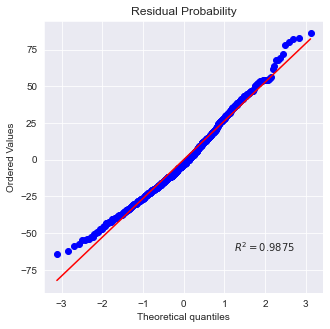

In [402]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(anova_model.resid, plot=plt, rvalue=True)
ax.set_title("Residual Probability", fontsize= 12)
ax.set

plt.show()

Visually, we see skewing so it cannot be normal. The Shapiro Wilks test's P value shows we can reject the null hypothesis that it is normal as well.

In [403]:
#Checking for Homogeneity of Variance using Levene's Test
stats.levene(df_clean['Glucose'][df_clean['Outcome'] == 0],
             df_clean['Glucose'][df_clean['Outcome'] == 1],
              )

LeveneResult(statistic=24.09717941137808, pvalue=1.1247265958007718e-06)

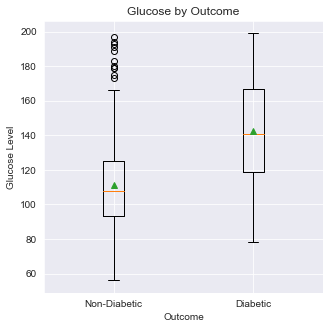

In [404]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Glucose by Outcome", fontsize= 12)
ax.set

data = [df_clean['Glucose'][df_clean['Outcome'] == 0],
        df_clean['Glucose'][df_clean['Outcome'] == 1],
       ]

ax.boxplot(data,
           labels= ['Non-Diabetic', 'Diabetic'],
           showmeans= True)

plt.xlabel("Outcome")
plt.ylabel("Glucose Level")

plt.show()

We can see visually the variance is not equal. As well, the Levene test shows we can reject the null and confirm it does not have equal variances. Similar to as before, we will proceed regardless.

##### Post-hoc

In [415]:
#Tukey HSD
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_clean['Glucose'], df_clean['Outcome'])
res = comp.tukeyhsd()
res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The Tukey HSD test shows we can reject the null hypothesis. There is a significant difference in Glucose between those with an Outcome of diabetes vs those with an Outcome of non-diabetes.

In [417]:
#Bonferri Correction
comp = mc.MultiComparison(df_clean['Glucose'], df_clean['Outcome'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>

Running the Bonferri Correction corroborates the Tukey HSD findings.

In [418]:
#Sidak Correction
comp = mc.MultiComparison(df_clean['Glucose'], df_clean['Outcome'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

<class 'statsmodels.iolib.table.SimpleTable'>

Running the Sidak Correction as well, we receive virtually the same results as the Bonferri Correction. We can comfortably say that there is a statistically significant difference between positive and negative Outcomes relative to Glucose.

### Multiple Linear Regression

#### Predicting Insulin

In [ ]:
x = df_clean.drop('Insulin', axis=1)
x = x.drop('BMI_Quantiles', axis=1)
y = df_clean['Insulin']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
model = ols.fit(x_train, y_train)

In [ ]:
y_prediction =  model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


score = r2_score(y_test, y_prediction)
print('R2: ', score)
print('MSE: ', mse(y_test, y_prediction))
print('RMSE: ', np.sqrt(mse(y_test, y_prediction)))

Judging from the R2, about 52% of the variance in insulin has been accounted for. This a decently significant amount. With a RMSE of only ~66.9, the accuracy is ok.

#### Predicting Glucose

In [ ]:
x = df_clean.drop('Glucose', axis=1)
x = x.drop('BMI_Quantiles', axis=1)
y = df_clean['Glucose']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
model = ols.fit(x_train, y_train)

In [ ]:
y_prediction =  model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


score = r2_score(y_test, y_prediction)
print('R2: ', score)
print('MSE: ', mse(y_test, y_prediction))
print('RMSE: ', np.sqrt(mse(y_test, y_prediction)))

Judging from the R2, about 59% of the variance in diabetes outcome has been accounted for. This a decently significant amount. With a RMSE of only ~18, the accuracy is very good too.

#### Predicting BMI

In [ ]:
x = df_clean.drop('BMI', axis=1)
x = x.drop('BMI_Quantiles', axis=1)
y = df_clean['BMI']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
model = ols.fit(x_train, y_train)

In [ ]:
y_prediction =  model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


score = r2_score(y_test, y_prediction)
print('R2: ', score)
print('MSE: ', mse(y_test, y_prediction))
print('RMSE: ', np.sqrt(mse(y_test, y_prediction)))

Judging from the R2, about 64% of the variance in diabetes outcome has been accounted for. This is a large amount. With a RMSE of only ~4.5, the accuracy is decent too.

### ANCOVA

##### One Way: Dependent Variable Glucose and Independent Variable BMI Quantiles
- **Null:** The quantities of BMI_Quantiles and Glucose are not related. p > 0.05
- **Alt:** The quantities of BMI_Quantiles and Glucose are related. p < 0.05

To create our ANCOVA model, we will use the Pingouin library.

We will check the effect of the BMI Quantiles on Glucose when considering almost all the other continuous features as covariates. 

In [477]:
from pingouin import ancova

covar_list = ['Insulin', 'BloodPressure', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction']
results = ancova(data=df_clean, dv="Glucose", covar=covar_list, between="BMI_Quantiles")
results

Source             SS   DF           F         p-unc  \
0             BMI_Quantiles    2785.563686    3    2.038658  1.070784e-01   
1                   Insulin  264816.596521    1  581.430386  2.589356e-95   
2             BloodPressure    7289.012518    1   16.003730  6.955417e-05   
3                       Age    3433.386099    1    7.538330  6.186205e-03   
4             SkinThickness    2229.892404    1    4.895944  2.722356e-02   
5  DiabetesPedigreeFunction    1371.627899    1    3.011541  8.308882e-02   
6                  Residual  337949.167154  742         NaN           NaN   

        np2  
0  0.008175  
1  0.439336  
2  0.021113  
3  0.010057  
4  0.006555  
5  0.004042  
6       NaN

From these p value results, we can conclude that BMI Quantiles is significant in predicting Glucose even when considering Insulin, BloodPressure, Age, and SkinThickness. However, we failed to reject the null hypothesis for DiabetesPedigreeFunction, meaning this feature is related to predicting Glucose.

#### Post-hoc

For the ANCOVA, we will conduct multiple hypothesis testing using the Benjamini-Hochberg FDR method. This will help us determine which features are significantly different from each other.

In [480]:
import statsmodels.stats.multitest as smt
smt.multipletests(results['p-unc'], alpha=0.05, method="fdr_bh")

(array([ True,  True,  True, False, False, False, False, False]),
 array([nan, nan, nan, nan, nan, nan, nan, nan]),
 0.006391150954545011,
 0.00625)

We can reject the null hypothesis for Insulin, Bloodpressure, Age, SkinThickness, and say that there is a statistically significant difference. Looking at the corrected alphas for the Sidak and Bonferroni corrections, our findings are consistent.

In [481]:
covar_list = ['Insulin', 'BloodPressure', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'BMI']
ancova(data=df_clean, dv="Glucose", covar=covar_list, between="BMI_Quantiles")

Source             SS   DF           F         p-unc  \
0             BMI_Quantiles    4709.878248    3    3.463082  1.600332e-02   
1                   Insulin  261508.980803    1  576.847418  1.007290e-94   
2             BloodPressure    6168.391711    1   13.606496  2.418921e-04   
3                       Age    4081.800881    1    9.003807  2.784567e-03   
4             SkinThickness    1155.201444    1    2.548192  1.108469e-01   
5  DiabetesPedigreeFunction    1135.571589    1    2.504891  1.139200e-01   
6                       BMI    2022.977853    1    4.462369  3.498337e-02   
7                  Residual  335926.189300  741         NaN           NaN   

        np2  
0  0.013827  
1  0.437719  
2  0.018031  
3  0.012005  
4  0.003427  
5  0.003369  
6  0.005986  
7       NaN

##### One Way: Dependent Variable Glucose and Independent Variable Outcome
- **Null:** The quantities of BMI_Quantiles and Glucose are not related. p > 0.05
- **Alt:** The quantities of BMI_Quantiles and Glucose are related. p < 0.05

We will check the effect of the Outcome on Glucose when considering almost all the other continuous features as covariates. 

In [478]:
covar_list = ['Insulin', 'BloodPressure', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'BMI']
results = ancova(data=df_clean, dv="Glucose", covar=covar_list, between="Outcome")
results

Source             SS   DF           F         p-unc  \
0                   Outcome   39088.841251    1   96.313302  1.847442e-21   
1                   Insulin  196230.828844    1  483.504715  6.298988e-83   
2             BloodPressure    5513.982208    1   13.586226  2.444244e-04   
3                       Age    1025.481297    1    2.526744  1.123564e-01   
4             SkinThickness     491.240914    1    1.210397  2.716097e-01   
5  DiabetesPedigreeFunction     105.098462    1    0.258958  6.109878e-01   
6                       BMI    1469.900768    1    3.621775  5.741423e-02   
7                  Residual  301547.226297  743         NaN           NaN   

        np2  
0  0.114753  
1  0.394213  
2  0.017957  
3  0.003389  
4  0.001626  
5  0.000348  
6  0.004851  
7       NaN

From these p value results, we can conclude that Outcome is significant in predicting Glucose even when considering Insulin and BloodPressure. However, we failed to reject the null hypothesis for Age, SkinThickness,DiabetesPedigreeFunction, and BMI meaning these feature are related to predicting Glucose.

#### Post-hoc

In [479]:
smt.multipletests(results['p-unc'], alpha=0.05, method="fdr_bh")

(array([ True,  True,  True, False, False, False, False, False]),
 array([nan, nan, nan, nan, nan, nan, nan, nan]),
 0.006391150954545011,
 0.00625)

We can reject the null hypothesis for Insulin and Bloodpressure only and say that there is a statistically significant difference. Looking at the corrected alphas for the Sidak and Bonferroni corrections, our findings are again consistent.

In [ ]:
covar_list = ['Insulin', 'BloodPressure', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'BMI']
ancova(data=df_clean, dv="Glucose", covar=covar_list, between="Outcome")

### Power Analysis

#### Significance
Following the above, we will have an alpha of 5%.

##### Type I Error
For Type I, we would have 5% based off the likelihood for the significance level.

#### Statistical Power
We will follow the common choice of assigning a statistical power of 80% or better.

##### Type II Error 
This leaves our Type II at 20% of the area probability-wise.




#### Effect Size

We will use Pearson's Correlation to determine the various effect sizes.

In [452]:
#Pearson's correlation
from scipy.stats import pearsonr

corr1, _ = pearsonr(df_clean['Glucose'], df_clean['Outcome'])
corr2, _ = pearsonr(df_clean['Glucose'], df_clean['BloodPressure'])
corr3, _ = pearsonr(df_clean['Glucose'], df_clean['BMI'])
corr4, _ = pearsonr(df_clean['Insulin'], df_clean['Outcome'])
corr5, _ = pearsonr(df_clean['BMI'], df_clean['Outcome'])

print('Glucose - Outcome: %.3f' % corr1)
print('Glucose - BloodPressure: %.3f' % corr2)
print('Glucose - BMI: %.3f' % corr3)
print('Insulin - Outcome: %.3f' % corr4)
print('BMI - Outcome: %.3f' % corr5)

Glucose - Outcome: 0.494
Glucose - BloodPressure: 0.226
Glucose - BMI: 0.230
Insulin - Outcome: 0.356
BMI - Outcome: 0.309


Judging from the above's results, we can see that there is a positive medium effect size between most of them, except for Glucose and Outcome. Glucose and Outcome seem as though they potentially have a large positive correlation.

#### Sample Size

We will use the TTestIndPower in order to determine the minimum number of samples needed for a desired effect. We will use 0.494 as our effect size as based on our Pearson correlations.

In [463]:
#Sample Size analysis
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=0.494, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
print('Sample Size: %.3f' % result)

Sample Size: 65.300


The above shows that the minimum for our sample size is about 65.